# Animation sweeping through zernike polynomials for focal spot reconstruction

Using the Poppy library in Python to simulate the Point Spread Function (PSF) of an optical system with a circular aperture and Zernike wavefront error (set up an optical system with a circular aperture, adds Zernike wavefront error to the system, and calculates the PSF at a specific wavelength.) This will give us a simulation with specific terms of Zernike added to the focal spot image at the exact wavelength running in Imperial Lab.

## Wavefront Error (WFE) Setup

pip install the poppy
(https://poppy-optics.readthedocs.io/en/latest/wfe.html)

define the a Zernike wavefront error with specific coefficients

define some constants in our optical system

In [1]:
pip install poppy

Note: you may need to restart the kernel to use updated packages.


The following terms of Zernike can be varied (can add more terms):

Piston: just disregarded

Tilt X: vertical tilt

Tilt Y: horizontal tilt

Focus or Defocus: longitudinal position

Astigmatism 45: Oblique astigmatism

Astigmatism 0: Vertical astigmatism

Each of them can be given the values by the parameter*e-9.

In [2]:
import poppy
parameter= [50, 50, -50, 100, 35] # need to change to namomter
coefficients_sequence = [parameter[0]*10**-9, parameter[1]*10**-9, parameter[2]*10**-9, parameter[3]*10**-9, parameter[4]*10**-9] # Zernike coefficients
wfe = poppy.ZernikeWFE(radius=1.0, coefficients=coefficients_sequence)
RADIUS = 1.0 # meters
WAVELENGTH = 532e-9 # The wavelength of laser we used in Imperial Lab
PIXSCALE = 0.01 # arcsec / pix
FOV = 1 # arcsec
NWAVES = 1.0


## Optical System Setup

sets up the optical system which includes a circular aperture, Zernike wavefront error (thin lens in this case), and a detector with specified pixel scale and field of view.

In [3]:
osys = poppy.OpticalSystem()
circular_aperture = poppy.CircularAperture(radius=RADIUS)
osys.add_pupil(circular_aperture)
thinlens = poppy.ZernikeWFE(radius=RADIUS, coefficients=coefficients_sequence)
osys.add_pupil(thinlens)
osys.add_detector(pixelscale=PIXSCALE, fov_arcsec=FOV)

## PSF Calculation

calculates the Point Spread Function (PSF) of the optical system at the specified wavelength and display


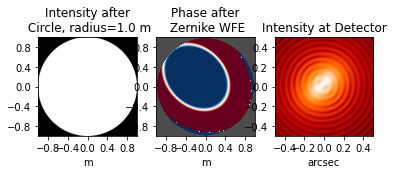

In [4]:
psf_with_zernikewfe = osys.calc_psf(wavelength=WAVELENGTH, display_intermediates=True)

## Animation 

pip install the package to use the animation

use five parameter input first to have a simple look at effect of Zernike terms on the focal spot




In [5]:
pip install matplotlib ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [6]:
from IPython.display import display, clear_output
import poppy
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets

RADIUS = 1.0  # meters
WAVELENGTH = 532e-9  # The wavelength of the laser used in Imperial Lab
PIXSCALE = 0.01  # arcsec / pix
FOV = 1  # arcsec

def update_zernike_parameters(param0, param1, param2, param3, param4):
    clear_output(wait=True)  # Clear the output in Jupyter Notebook
    
    osys_intermediate = poppy.OpticalSystem()
    circular_aperture = poppy.CircularAperture(radius=RADIUS)
    osys_intermediate.add_pupil(circular_aperture)
    
    # Add the Zernike pupil with the current parameters
    coefficients_sequence = [param0*10**-9, param1*10**-9, param2*10**-9, param3*10**-9, param4*10**-9]
    thin_lens_pupil = poppy.ZernikeWFE(radius=RADIUS, coefficients=coefficients_sequence)
    osys_intermediate.add_pupil(thin_lens_pupil)
    
    # Propagate the wavefront to the final stage
    osys_intermediate.add_detector(pixelscale=PIXSCALE, fov_arcsec=FOV)
    psf_intermediate = osys_intermediate.calc_psf(wavelength=WAVELENGTH)
    
    intermediate_psf = psf_intermediate[0].data
    
    plt.imshow(intermediate_psf, cmap='viridis', origin='lower')
    plt.colorbar()
    plt.title('Intermediate Intensity Distribution')
    plt.show()

# Set up interactive widgets for parameter adjustment
params = [0, 0, 0, 0, 0]
param_names = ['Parameter 0', 'Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4']
widgets_list = [widgets.FloatSlider(value=params[i], min=-100, max=100, step=1, description=param_names[i])
                for i in range(5)]

interactive_plot = interactive(update_zernike_parameters, param0=widgets_list[0], param1=widgets_list[1],
                               param2=widgets_list[2], param3=widgets_list[3], param4=widgets_list[4])
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot



   

    
 

interactive(children=(FloatSlider(value=0.0, description='Parameter 0', min=-100.0, step=1.0), FloatSlider(val…

let's go crazier with more terms! number of terms can be adjust by "NUM_PARAMETERS"

In [7]:
from IPython.display import display, clear_output
import poppy
import matplotlib.pyplot as plt
from ipywidgets import widgets

RADIUS = 1.0  # meters
WAVELENGTH = 532e-9  # The wavelength of the laser used in Imperial Lab
PIXSCALE = 0.01  # arcsec / pix
FOV = 1  # arcsec
NUM_PARAMETERS = 10  # Number of Zernike parameters, try as many as you want!

def update_zernike_parameters(**params):
    clear_output(wait=True)  # Clear the output in Jupyter Notebook
    
    osys_intermediate = poppy.OpticalSystem()
    circular_aperture = poppy.CircularAperture(radius=RADIUS)
    osys_intermediate.add_pupil(circular_aperture)
    
    # Add the Zernike pupil with the current parameters
    coefficients_sequence = [params[f'Parameter_{i}']*10**-9 for i in range(NUM_PARAMETERS)]
    thin_lens_pupil = poppy.ZernikeWFE(radius=RADIUS, coefficients=coefficients_sequence)
    osys_intermediate.add_pupil(thin_lens_pupil)
    
    # Propagate the wavefront to the final stage
    osys_intermediate.add_detector(pixelscale=PIXSCALE, fov_arcsec=FOV)
    psf_intermediate = osys_intermediate.calc_psf(wavelength=WAVELENGTH)
    
    intermediate_psf = psf_intermediate[0].data
    
    plt.imshow(intermediate_psf, cmap='viridis', origin='lower')
    plt.colorbar()
    plt.title('Intermediate Intensity Distribution')
    plt.show()

# Set up interactive widgets for parameter adjustment
param_sliders = {f'Parameter_{i}': widgets.FloatSlider(value=0, min=-100, max=100, step=1, description=f'Parameter {i}')
                 for i in range(NUM_PARAMETERS)}

widgets.interact_manual(update_zernike_parameters, **param_sliders)


interactive(children=(FloatSlider(value=0.0, description='Parameter 0', min=-100.0, step=1.0), FloatSlider(val…

<function __main__.update_zernike_parameters(**params)>